In this notebook, we compare the time-domain and frequency domain $S_{11}$ of the CTP feeds as a function of rigging height. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import gainData as gd
import os
import cosmology as cosmo
C=3e8
PI=np.pi

0.048252


First we load in the simulated gains in the time-domain.

In [4]:
gains_short=[]
root_dir_short=('/Users/aaronew/Dropbox_MIT/Science'
              '/simulations-hera-eox/data/timetraces'
              '/time_trace_ctp_vary_rigging_short/')
file_list_short=[root_dir_short+'time_trace_run00000%d.txt'%m for m in range(1,6)]
for hnum,filename in enumerate(file_list_short):
        gains_short.append(gd.GainData(filename,'CST_TimeTrace',fMin=0.05,fMax=.15))
        gains_short[-1].export_CST_freq_s11(root_dir_short+'run00000%d_s11'%(hnum+1))
gains_tall=[]
root_dir_tall=('/Users/aaronew/Dropbox_MIT/Science'
              '/simulations-hera-eox/data/timetraces'
              '/time_trace_ctp_vary_rigging_tall/')
file_list_tall=[root_dir_tall+'run00000%d_timetrace.txt'%m for m in range(1,5)]
for hnum,filename in enumerate(file_list_tall):
        gains_tall.append(gd.GainData(filename,'CST_TimeTrace',fMin=0.05,fMax=.15))
        gains_tall[-1].export_CST_freq_s11(root_dir_tall+'run00000%d_s11'%(hnum+1))

In [3]:
heights=np.array(154.328+np.array([m*(231.492-154.328)/4 for m in range(5)]))/12.*.3048

Here we plot the delay-response of the short CTP feed as a function of feed height

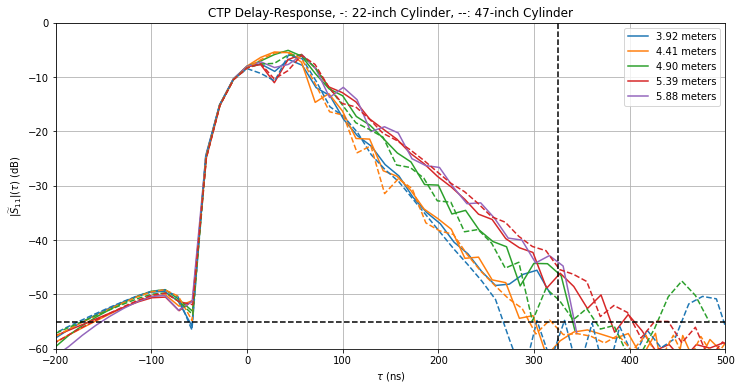

In [22]:
lines_short=[]
for gain,height in zip(gains_short,heights):
    lines_short.append(plt.plot(gain.tAxis,10.*np.log10(np.abs(gain.gainDelay)),
                                label='%.2f meters'%height))

lindex=0
for gain,height in zip(gains_tall,heights[:-1]):
    plt.plot(gain.tAxis,10*np.log10(np.abs(gain.gainDelay)),
            color=lines_short[lindex][0].get_color(),
            ls='--')
    lindex+=1
plt.xlim(-200,500)
plt.ylim(-60,0)
plt.legend()
plt.axvline(325,color='k',ls='--')
plt.axhline(-55,color='k',ls='--')
plt.grid()
plt.xlabel('$\\tau$ (ns)')
plt.ylabel('$|\widetilde{S}_{11}|$($\\tau$) (dB)')
plt.gcf().set_size_inches(12,6)
plt.title('CTP Delay-Response, -: 22-inch Cylinder, --: 47-inch Cylinder')
plt.savefig('../analysis/compare_timetraces_feed_height.png')

In [21]:
fAxis=(150+np.arange(-110,110))*1e6
Tsky=60.*(C/fAxis)**2.55
Trx=85.
eps=0.74
FTIME=1.5
T0=100.
s11SpecLow=1.-Trx/(eps*Tsky*(np.sqrt(FTIME)-1.))
s11SpecMid=np.ones_like(s11SpecLow)-Trx/(100.)
s11SpecHigh=1.-Trx/(eps*(500-Tsky))
s11SpecAlt=1.-Trx/(eps*(Tsky+T0)*(np.sqrt(FTIME)-Tsky/(Tsky+T0)))
s11SpecAll=np.zeros_like(s11SpecLow)
for m in range(len(s11SpecLow)):
    #print [s11SpecLow[m],s11SpecMid[m],s11SpecHigh[m]]
    select=np.invert(np.array([s11SpecLow[m],
                               s11SpecMid[m],
                               s11SpecHigh[m]])>=1.)
    s11SpecAll[m]=np.max(np.array([s11SpecLow[m],
                                   s11SpecMid[m],
                                   s11SpecHigh[m]])[select])

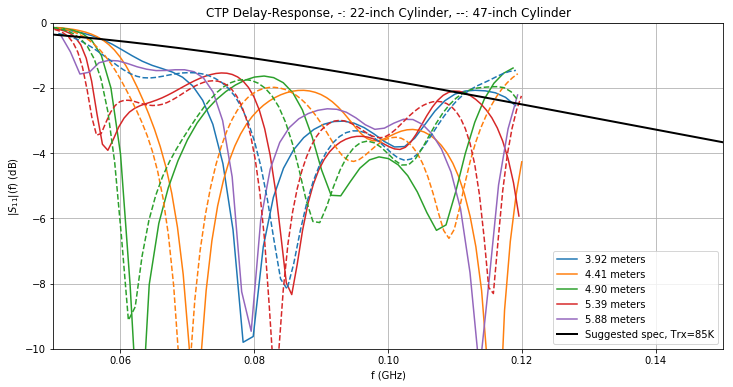

In [20]:
lines_short=[]
for gain,height in zip(gains_short,heights):
    lines_short.append(plt.plot(gain.fAxis,10.*np.log10(np.abs(gain.gainFrequency)),
                                label='%.2f meters'%height))

lindex=0
for gain,height in zip(gains_tall,heights[:-1]):
    plt.plot(gain.fAxis,10*np.log10(np.abs(gain.gainFrequency)),
            color=lines_short[lindex][0].get_color(),
            ls='--')
    lindex+=1
plt.xlim(0.05,0.15)
plt.ylim(-10,0)
plt.plot(fAxis/1e9,10.*np.log10(s11SpecAlt),label='Suggested spec, Trx=85K',color='k',lw=2)
plt.legend()
plt.grid()
plt.xlabel('f (GHz)')
plt.ylabel('$|S_{11}|$(f) (dB)')
plt.gcf().set_size_inches(12,6)
plt.title('CTP Delay-Response, -: 22-inch Cylinder, --: 47-inch Cylinder')
plt.savefig('../analysis/compare_freqtraces_feed_height.png')

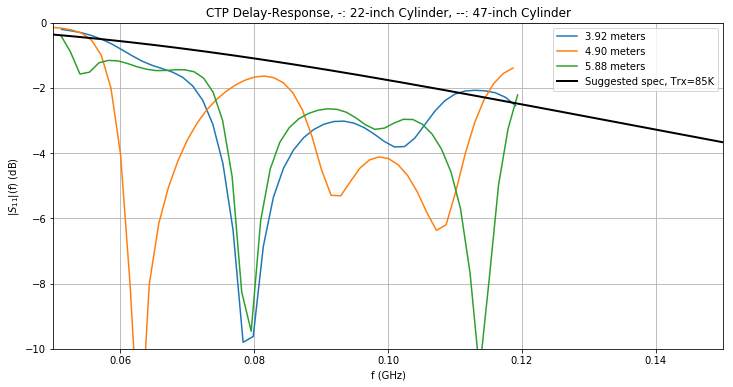

In [25]:
lines_short=[]
for gain,height in zip(gains_short[::2],heights[::2]):
    lines_short.append(plt.plot(gain.fAxis,10.*np.log10(np.abs(gain.gainFrequency)),
                                label='%.2f meters'%height))

#lindex=0
#for gain,height in zip(gains_tall,heights[:-1]):
#    plt.plot(gain.fAxis,10*np.log10(np.abs(gain.gainFrequency)),
#            color=lines_short[lindex][0].get_color(),
#            ls='--')
#    lindex+=1
plt.xlim(0.05,0.15)
plt.ylim(-10,0)
plt.plot(fAxis/1e9,10.*np.log10(s11SpecAlt),label='Suggested spec, Trx=85K',color='k',lw=2)
plt.legend()
plt.grid()
plt.xlabel('f (GHz)')
plt.ylabel('$|S_{11}|$(f) (dB)')
plt.gcf().set_size_inches(12,6)
plt.title('CTP Delay-Response, -: 22-inch Cylinder, --: 47-inch Cylinder')
#plt.savefig('../analysis/compare_freqtraces_feed_height.png')

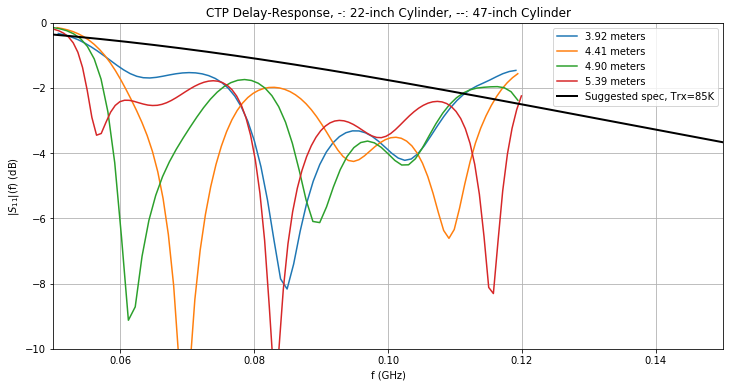

In [24]:
lines_short=[]
for gain,height in zip(gains_tall,heights[:-1]):
    lines_short.append(plt.plot(gain.fAxis,10.*np.log10(np.abs(gain.gainFrequency)),
                                label='%.2f meters'%height))

#lindex=0
#for gain,height in zip(gains_tall,heights[:-1]):
#    plt.plot(gain.fAxis,10*np.log10(np.abs(gain.gainFrequency)),
#            color=lines_short[lindex][0].get_color(),
#            ls='--')
#    lindex+=1
plt.xlim(0.05,0.15)
plt.ylim(-10,0)
plt.plot(fAxis/1e9,10.*np.log10(s11SpecAlt),label='Suggested spec, Trx=85K',color='k',lw=2)
plt.legend()
plt.grid()
plt.xlabel('f (GHz)')
plt.ylabel('$|S_{11}|$(f) (dB)')
plt.gcf().set_size_inches(12,6)
plt.title('CTP Delay-Response, -: 22-inch Cylinder, --: 47-inch Cylinder')
#plt.savefig('../analysis/compare_freqtraces_feed_height.png')

Now we inspect subband performance. We focus on three different sub-bands; 60-90 MHz, 90-120 MHz, 75-105MHz. 

In [26]:
gains_short=[]
minFreqs=[.06,.075,.09]
maxFreqs=[.09,.105,.120]
root_dir_short=('/Users/aaronew/Dropbox_MIT/Science'
              '/simulations-hera-eox/data/timetraces'
              '/time_trace_ctp_vary_rigging_short/')
file_list_short=[root_dir_short+'time_trace_run00000%d.txt'%m for m in range(1,6)]
for filename in file_list_short:
        subbands=[]
        for bnum in range(3):
            subbands.append(gd.GainData(filename,'CST_TimeTrace',fMin=minFreqs[bnum],fMax=maxFreqs[bnum]))
        gains_short.append(subbands)
gains_tall=[]
root_dir_tall=('/Users/aaronew/Dropbox_MIT/Science'
              '/simulations-hera-eox/data/timetraces'
              '/time_trace_ctp_vary_rigging_tall/')
file_list_tall=[root_dir_tall+'run00000%d_timetrace.txt'%m for m in range(1,5)]
for filename in file_list_tall:
        subbands=[]
        for bnum in range(3):
            subbands.append(gd.GainData(filename,'CST_TimeTrace',fMin=minFreqs[bnum],fMax=maxFreqs[bnum]))
        gains_tall.append(subbands)

Now plot the delay-domain $S_{11}$ for each subband as a function of hieght. 

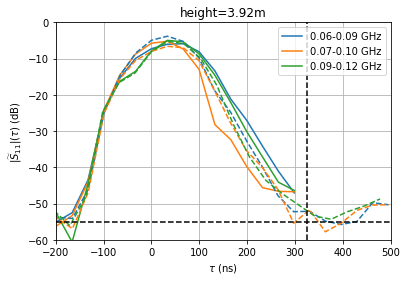

In [54]:
lines_short=[]
hnum=0
for bandnum in range(len(minFreqs)):
    height=heights[hnum]
    gain=gains_short[hnum][bandnum]
    lines_short.append(plt.plot(gain.tAxis,10.*np.log10(np.abs(gain.gainDelay)),
                                label='%.2f-%.2f GHz'%(minFreqs[bandnum],maxFreqs[bandnum])))

lindex=0
for bandnum in range(len(minFreqs)):
    gain=gains_tall[hnum][bandnum]
    height=heights[hnum]
    plt.plot(gain.tAxis,10*np.log10(np.abs(gain.gainDelay)),
            color=lines_short[lindex][0].get_color(),
            ls='--')
    lindex+=1
plt.xlim(-200,500)
plt.ylim(-60,0)
plt.legend()
plt.axvline(325,color='k',ls='--')
plt.axhline(-55,color='k',ls='--')
plt.grid()
plt.xlabel('$\\tau$ (ns)')
plt.ylabel('$|\widetilde{S}_{11}|$($\\tau$) (dB)')
plt.gcf().set_size_inches(6,4)
plt.title('height=%.2fm'%height)
plt.savefig('../analysis/compare_timetraces_subbands_feed_height_%.2fm.png'%height)

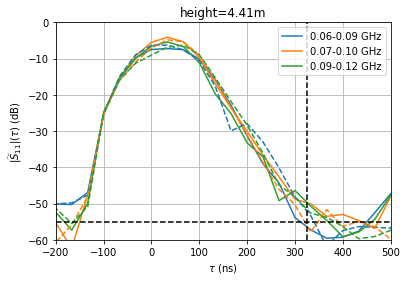

In [53]:
lines_short=[]
hnum=1
for bandnum in range(len(minFreqs)):
    height=heights[hnum]
    gain=gains_short[hnum][bandnum]
    lines_short.append(plt.plot(gain.tAxis,10.*np.log10(np.abs(gain.gainDelay)),
                                label='%.2f-%.2f GHz'%(minFreqs[bandnum],maxFreqs[bandnum])))

lindex=0
for bandnum in range(len(minFreqs)):
    gain=gains_tall[hnum][bandnum]
    height=heights[hnum]
    plt.plot(gain.tAxis,10*np.log10(np.abs(gain.gainDelay)),
            color=lines_short[lindex][0].get_color(),
            ls='--')
    lindex+=1
plt.xlim(-200,500)
plt.ylim(-60,0)
plt.legend()
plt.axvline(325,color='k',ls='--')
plt.axhline(-55,color='k',ls='--')
plt.grid()
plt.xlabel('$\\tau$ (ns)')
plt.ylabel('$|\widetilde{S}_{11}|$($\\tau$) (dB)')
plt.gcf().set_size_inches(6,4)
plt.title('height=%.2fm'%height)
plt.savefig('../analysis/compare_timetraces_subbands_feed_height_%.2fm.png'%height)

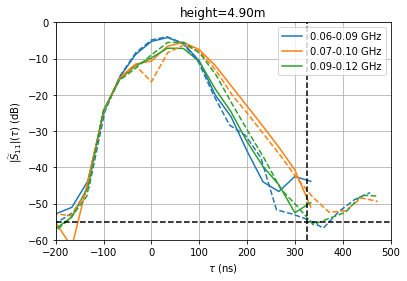

In [52]:
lines_short=[]
hnum=2
for bandnum in range(len(minFreqs)):
    height=heights[hnum]
    gain=gains_short[hnum][bandnum]
    lines_short.append(plt.plot(gain.tAxis,10.*np.log10(np.abs(gain.gainDelay)),
                                label='%.2f-%.2f GHz'%(minFreqs[bandnum],maxFreqs[bandnum])))

lindex=0
for bandnum in range(len(minFreqs)):
    gain=gains_tall[hnum][bandnum]
    height=heights[hnum]
    plt.plot(gain.tAxis,10*np.log10(np.abs(gain.gainDelay)),
            color=lines_short[lindex][0].get_color(),
            ls='--')
    lindex+=1
plt.xlim(-200,500)
plt.ylim(-60,0)
plt.legend()
plt.axvline(325,color='k',ls='--')
plt.axhline(-55,color='k',ls='--')
plt.grid()
plt.xlabel('$\\tau$ (ns)')
plt.ylabel('$|\widetilde{S}_{11}|$($\\tau$) (dB)')
plt.gcf().set_size_inches(6,4)
plt.title('height=%.2fm'%height)
plt.savefig('../analysis/compare_timetraces_subbands_feed_height_%.2fm.png'%height)

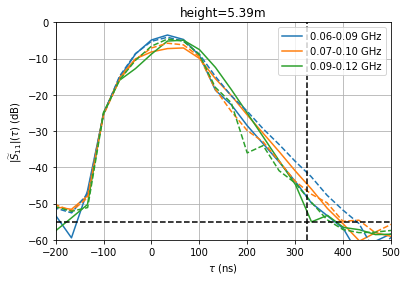

In [50]:
lines_short=[]
hnum=3
for bandnum in range(len(minFreqs)):
    height=heights[hnum]
    gain=gains_short[hnum][bandnum]
    lines_short.append(plt.plot(gain.tAxis,10.*np.log10(np.abs(gain.gainDelay)),
                                label='%.2f-%.2f GHz'%(minFreqs[bandnum],maxFreqs[bandnum])))

lindex=0
for bandnum in range(len(minFreqs)):
    gain=gains_tall[hnum][bandnum]
    height=heights[hnum]
    plt.plot(gain.tAxis,10*np.log10(np.abs(gain.gainDelay)),
            color=lines_short[lindex][0].get_color(),
            ls='--')
    lindex+=1
plt.xlim(-200,500)
plt.ylim(-60,0)
plt.legend()
plt.axvline(325,color='k',ls='--')
plt.axhline(-55,color='k',ls='--')
plt.grid()
plt.xlabel('$\\tau$ (ns)')
plt.ylabel('$|\widetilde{S}_{11}|$($\\tau$) (dB)')
plt.gcf().set_size_inches(6,4)
plt.title('height=%.2fm'%height)
plt.savefig('../analysis/compare_timetraces_subbands_feed_height_%.2fm.png'%height)